In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv

In [8]:
x=[]  #feature matrix
y=[]  #Targeted attribute vector
x0=[]
x1=[]

In [9]:
with open("data1.csv","r") as read_file:
    lines=csv.reader(read_file)
    ds=list(lines)
    for i in range(len(ds)):
        temp=ds[i][0].split(",")
        a = float(temp[0])
        b = float(temp[1])
        c = int(temp[2],2)
        x.append([a,b])
        y.append([c])
        if(c==0):
            x0.append([a,b])
        if(c==1):
            x1.append([a,b])
# Adding ones        
one=np.ones([len(x),1])
x=np.concatenate((one,x),axis=1)
x0=np.array(x0)
x1=np.array(x1)
#Doing Normalization
x0=(x0-np.mean(x0))/np.std(x0)
x1=(x1-np.mean(x1))/np.std(x1)
x=(x-np.mean(x))/np.std(x)
y=np.array(y)

In [10]:
#Initializing the parameters
theta = np.matrix(np.zeros(3))

#Spliting testing and training data using train_test_split method

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 50,test_size=.3)


#set gradient parameters
count = 0
alpha = [0.1,0.03]
no_iter = 800

#checking dimension
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(70, 3) (30, 3) (70, 1) (30, 1)


parameters after gradient descent= [[-0.0170849   0.11274206  0.10827063]]

parameters after gradient descent= [[-0.0170849   0.11274206  0.10827063]]


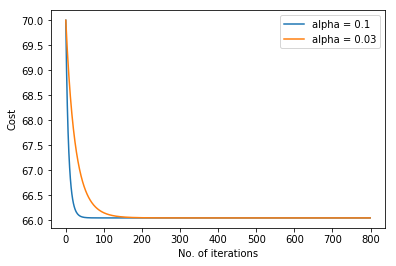


Correct predictions out of 36 test points is (For alpha = 0.03) 21
Accuracy achieved= 70.0 %


In [11]:
##Gradient Descent + Regularizer ##
lemda=100
def gradient_descent(X,Y,theta,alpha,no_iter):
    cost=[]
    m = len(x)
    for i in range(0,no_iter):
        #calculating hypothesis
        hypo = X * theta.T    
        ie = np.exp((-1) * hypo)
        hypo = 1 / (1 + ie)
        #calculating Cost function
        temp = np.log2( hypo )
        temp1 = np.log2(1 - hypo)
        y1 = (-1)*(np.matmul(Y.T,temp))
        y0 = (-1)*(np.matmul((1-Y).T,temp1))
        cost_value = y1 + y0
        error = hypo - Y
        gradient = (error.T*X)/m
        cost.append(cost_value)
        theta = theta-(alpha * (gradient + lemda / m * theta))
    return theta,cost

cost_list = []
para_list =[]
for a in alpha:
    para,cost=gradient_descent(x_train,y_train,theta,a,no_iter)
    para_list.append(para)
    cost_list.append(cost)

print("parameters after gradient descent=",para_list[0])
print()
print("parameters after gradient descent=",para_list[1])

it=np.arange(0,no_iter)
plt.plot(it,np.squeeze(cost_list[0]),label="alpha = 0.1")
plt.plot(it,np.squeeze(cost_list[1]),label="alpha = 0.03")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

##calculating sum of squared error

predicted_y = np.matmul(x_test,para_list[0].transpose())
predicted_y = 1/(1 + np.exp((-1) * predicted_y))
predicted_y = np.where(predicted_y >= 0.5,1,0)
predicted_y = np.squeeze(predicted_y)

for i in range(0,len(predicted_y)):
    if(predicted_y[i] == y_test[i]):
        count=count+1

predicted_y = np.matmul(x_test,para_list[1].transpose())
predicted_y = 1/(1 + np.exp((-1) * predicted_y))
predicted_y = np.where(predicted_y >= 0.5,1,0)
predicted_y = np.squeeze(predicted_y)
count = 0;
for i in range(0,len(predicted_y)):
    if(predicted_y[i] == y_test[i]):
        count=count+1
print()
print("Correct predictions out of 36 test points is (For alpha = 0.03)",count)
print("Accuracy achieved=",count/len(predicted_y)*100,"%")

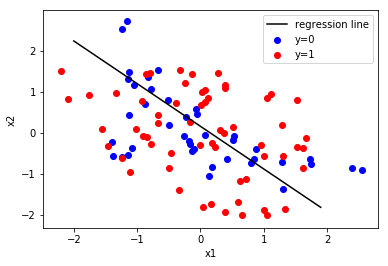

In [12]:
##Using entire dataset for plotting the graph as there are lesser test points
x0=np.array(x0)
x1=np.array(x1)
plt.scatter([x0[:,0]],[x0[:,1]],c='b',label='y=0')
plt.scatter([x1[:,0]],[x1[:,1]],c='r',label='y=1')
x1=np.arange(-2,2,0.1)
x2=-(para_list[0][0,0]+para_list[0][0,1]*x1)/para_list[0][0,2]
plt.plot(x1,x2,c='k',label='regression line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()